# Fit experimental data to extract simulation paramters

## Import packages

In [1]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pickle

from colicycle import exp_parameters as ep

# Define experimental parameters

In [2]:
#Define folder containing experiments
folder_prefix = '../PreProcessed/'

In [3]:
dataset_list = [folder_prefix+'20170327_GW339_temp/colidata.pkl',
                folder_prefix+'20180709_GW296_glucose8aa37_1_MMStack/colidata.pkl',
                folder_prefix+'20180711_GW296_glucose37_1_MMStack/colidata.pkl',
                folder_prefix+'20180706_GW296_glycerol37_1_MMStack/colidata.pkl']
periods = [1,0,0,0]

## For each data set calculate variables means and variances by fitting histograms with normal or log normal distributions

/Users/gw18g940/GoogleDrive/PostDocBasel/ColiPublication_GDrive/DoubleAdderCode/colicycle/colicycle/exp_parameters.py:56: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  temp2 = colidata.loc[colidata[(colidata.mother_id>0)].mother_id][field].rename('tau2')
/Users/gw18g940/miniconda3/envs/doubleadder/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


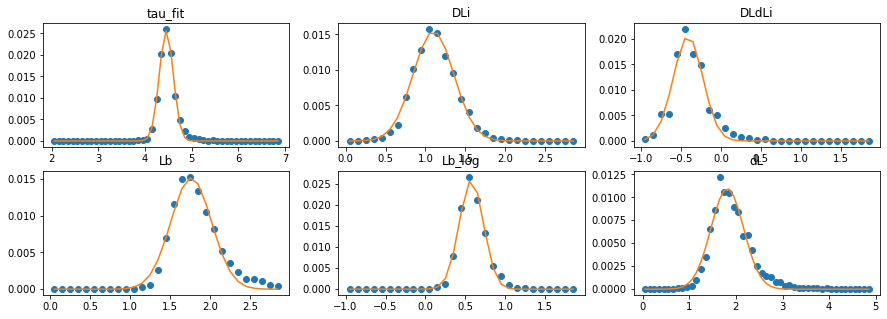

/Users/gw18g940/GoogleDrive/PostDocBasel/ColiPublication_GDrive/DoubleAdderCode/colicycle/colicycle/exp_parameters.py:56: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  temp2 = colidata.loc[colidata[(colidata.mother_id>0)].mother_id][field].rename('tau2')


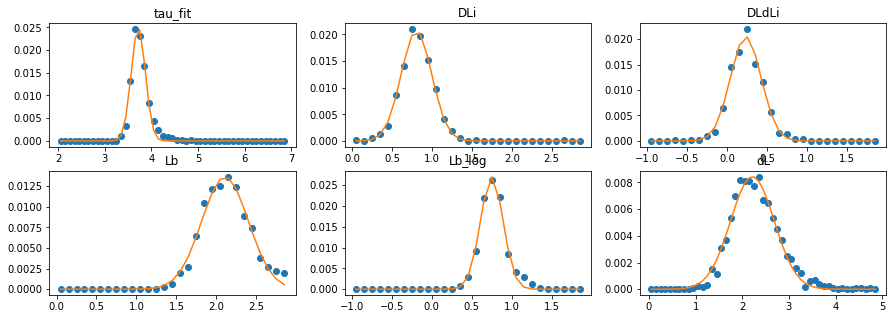

/Users/gw18g940/GoogleDrive/PostDocBasel/ColiPublication_GDrive/DoubleAdderCode/colicycle/colicycle/exp_parameters.py:56: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  temp2 = colidata.loc[colidata[(colidata.mother_id>0)].mother_id][field].rename('tau2')


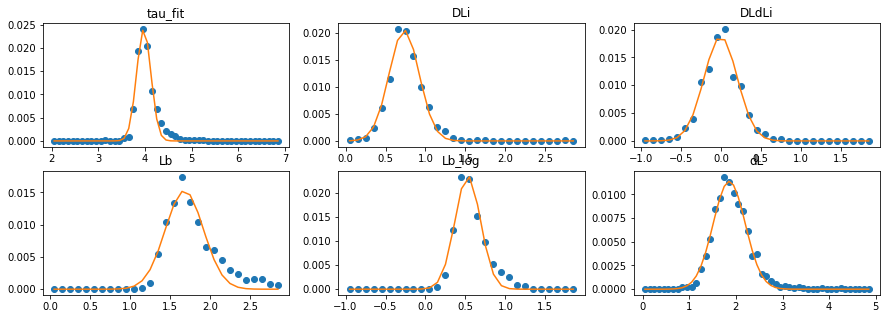

/Users/gw18g940/GoogleDrive/PostDocBasel/ColiPublication_GDrive/DoubleAdderCode/colicycle/colicycle/exp_parameters.py:56: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  temp2 = colidata.loc[colidata[(colidata.mother_id>0)].mother_id][field].rename('tau2')


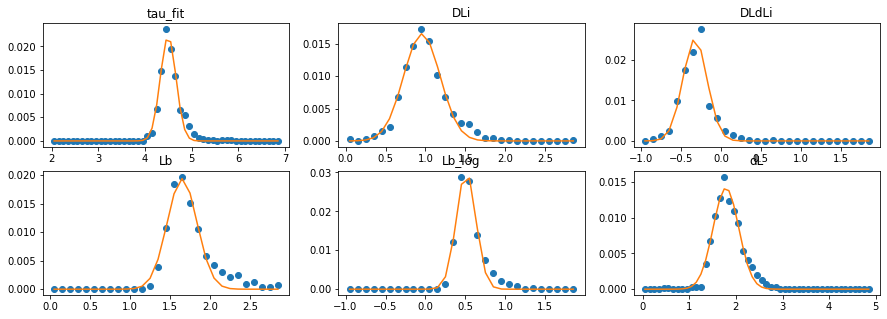

In [22]:
for ind, datafile in enumerate(dataset_list):
    colidata = ep.load_data(datafile, period=periods[ind])
    
    param_storage={}
    colidata['DLdLi'] = 0.5*(colidata['Ld']-colidata['Li'])
    colidata['dL'] = colidata['Ld_fit']-colidata['Lb_fit']
    tau_corr = ep.calculate_tau_correlation(colidata,'tau_fit')
    bin_pos_tau, valbins_tau, res_fit_tau = ep.fit_logn(colidata,'tau_fit',np.arange(2,7,0.1))
    bin_pos_DLi, valbins_DLi, res_fit_DLi = ep.fit_normal(colidata,'DLi',np.arange(0,3,0.1))
    bin_pos_DLdLi, valbins_DLdLi, res_fit_DLdLi = ep.fit_logn(colidata,'DLdLi',np.arange(-1,2,0.1))
    bin_pos_Lb, valbins_Lb, res_fit_Lb = ep.fit_normal(colidata,'Lb_fit',np.arange(0,3,0.1))
    bin_pos_Lblog, valbins_Lblog, res_fit_Lblog = ep.fit_logn(colidata,'Lb_fit',np.arange(-1,2,0.1))
    bin_pos_dL, valbins_dL, res_fit_dL = ep.fit_normal(colidata,'dL',np.arange(0,5,0.1))
    divR_std = ep.calculate_div_ratio(colidata)

    param_storage['tau_corr'] = tau_corr
    param_storage['fit_logtau'] = res_fit_tau.x
    param_storage['fit_DLi'] = res_fit_DLi.x
    param_storage['fit_logDLdLi'] = res_fit_DLdLi.x
    param_storage['fit_Lb'] = res_fit_Lb.x
    param_storage['fit_logLb'] = res_fit_Lblog.x
    param_storage['fit_dL'] = res_fit_dL.x
    param_storage['divR_std'] = divR_std


    fig,axes = plt.subplots(2,3, figsize=(15,5))
    axes[0,0].plot(bin_pos_tau, valbins_tau,'o')
    axes[0,0].plot(bin_pos_tau, ep.fun_single_gauss(bin_pos_tau, *res_fit_tau.x))
    axes[0,0].set_title('tau_fit')
    axes[0,1].plot(bin_pos_DLi, valbins_DLi,'o')
    axes[0,1].plot(bin_pos_DLi, ep.fun_single_gauss(bin_pos_DLi, *res_fit_DLi.x))
    axes[0,1].set_title('DLi')
    axes[0,2].plot(bin_pos_DLdLi, valbins_DLdLi,'o')
    axes[0,2].plot(bin_pos_DLdLi, ep.fun_single_gauss(bin_pos_DLdLi, *res_fit_DLdLi.x))
    axes[0,2].set_title('DLdLi')
    axes[1,0].plot(bin_pos_Lb, valbins_Lb,'o')
    axes[1,0].plot(bin_pos_Lb, ep.fun_single_gauss(bin_pos_Lb, *res_fit_Lb.x))
    axes[1,0].set_title('Lb')
    axes[1,1].plot(bin_pos_Lblog, valbins_Lblog,'o')
    axes[1,1].plot(bin_pos_Lblog, ep.fun_single_gauss(bin_pos_Lblog, *res_fit_Lblog.x))
    axes[1,1].set_title('Lb_log')
    axes[1,2].plot(bin_pos_dL, valbins_dL,'o')
    axes[1,2].plot(bin_pos_dL, ep.fun_single_gauss(bin_pos_dL, *res_fit_dL.x))
    axes[1,2].set_title('dL')

    plt.show()
    
    with open(os.path.dirname(os.path.normpath(datafile))+'/simul_params.pkl', 'wb') as f:
        pickle.dump(param_storage, f, pickle.HIGHEST_PROTOCOL)